In [1]:
# Import necessary libraries
# Your calling code (e.g., in a script or notebook)

from sequenzo import * # Import the package, give it a short alias
import pandas as pd # Data manipulation

# List all the available datasets in Sequenzo
# Now access functions using the alias:
print('Available datasets in Sequenzo: ', list_datasets())

# Load the data that we would like to explore in this tutorial
# `df` is the short for `dataframe`, which is a common variable name for a dataset
# df = load_dataset('country_co2_emissions')
df = load_dataset('pairfam_family')

# Show the dataframe
df

Available datasets in Sequenzo:  ['country_co2_emissions_local_quintiles', 'country_co2_emissions_local_deciles', 'polyadic_seqc1', 'polyadic_samplep1', 'mvad', 'chinese_colonial_territories', 'polyadic_samplec1', 'country_gdp_per_capita', 'polyadic_seqp1', 'country_co2_emissions', 'biofam_married_domain', 'country_co2_emissions_global_deciles', 'country_co2_emissions_global_quintiles', 'biofam', 'pairfam_family', 'biofam_left_domain', 'biofam_child_domain']


,id,weight40,sex,doby_gen,dob,ethni,migstatus,yeduc,sat1i4,sat5,...,255,256,257,258,259,260,261,262,263,264
0,111000.0,0.343964,1,1971,855,1,1,11.5,5,7,...,4,4,4,4,4,4,4,4,4,4
1,1624000.0,1.467063,1,1973,880,1,1,11.5,9,8,...,8,8,8,8,8,8,8,8,8,8
2,2767000.0,0.463918,1,1971,853,1,1,9.0,9,-2,...,8,8,8,8,8,8,8,8,8,8
3,2931000.0,1.767455,0,1973,881,5,3,10.5,5,5,...,9,9,9,9,9,9,9,9,9,9
4,3167000.0,0.884521,1,1973,883,1,1,11.5,8,10,...,8,8,8,8,8,8,8,8,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1861,919347000.0,0.964979,0,1973,880,1,1,11.5,8,4,...,1,1,1,1,1,1,1,1,1,1
1862,919488000.0,1.981277,0,1971,863,1,1,10.5,10,2,...,9,9,9,9,9,9,9,9,9,9
1863,919910000.0,0.485150,1,1973,878,1,1,20.0,7,7,...,8,8,8,8,8,8,8,8,8,8
1864,920140000.0,2.022823,0,1971,859,1,1,11.5,10,10,...,7,7,7,7,7,7,7,7,7,7


In [2]:
list(df.columns)[:20]

['id',
 'weight40',
 'sex',
 'doby_gen',
 'dob',
 'ethni',
 'migstatus',
 'yeduc',
 'sat1i4',
 'sat5',
 'sat6',
 'highschool',
 'church',
 'biosib',
 'stepsib',
 'east',
 'famstructure18',
 '1',
 '2',
 '3']

In [3]:
# Define time span: 264 months (e.g., 1 ... 264)
time_list = [f"{i}" for i in range(1, 265)]

# Define 9 states (numeric codes 1–9)
states = list(range(1, 10))

# Define labels for each state
labels = [
    "Single, no child",
    "Living apart together, no child",
    "Cohabiting, no child",
    "Married, no child",
    "Single, with child(ren)",
    "LAT, with child(ren)",
    "Cohabiting, with child(ren)",
    "Married, 1 child",
    "Married, 2+ children"
]

colors = [
    "#74C9B4",  # 青翠色（山间新绿）
    "#A6E3D0",  # 水绿（溪水清波）
    "#F9E79F",  # 杏黄（阳光轻照）
    "#F6CDA3",  # 橙杏色（晚霞暖色）
    "#F5B7B1",  # 粉黛色（桃花春风）
    "#D7BDE2",  # 淡紫（兰花幽香）
    "#A3C4F3",  # 天青色（青花瓷釉）
    "#7FB3D5",  # 碧蓝（江天一色）
    "#EAECEE"   # 云白（轻雾朦胧）
]



# Initialize SequenceData object
sequence_data = SequenceData(
    df,
    time=time_list,
    id_col="id",   # your dataset has column "id", not "country"
    states=states,
    labels=labels,
    weights=df['weight40'].values,  # Extract the weight column values
    custom_colors=colors
)



[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 1866
[>] Number of time points: 264
[>] Min/Max sequence length: 264 / 264
[>] States: [1, 2, 3, 4, 5, 6, 7, 8, 9]
[>] Labels: ['Single, no child', 'Living apart together, no child', 'Cohabiting, no child', 'Married, no child', 'Single, with child(ren)', 'LAT, with child(ren)', 'Cohabiting, with child(ren)', 'Married, 1 child', 'Married, 2+ children']
[>] Weights: Provided (total weight=2346.268, mean=1.257, std=1.046)


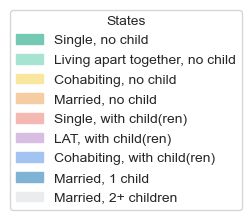

In [4]:
# handles, legend_labels = sequence_data.get_legend()
sequence_data.plot_legend()

### SAMM (Sequence Analysis Multi-state Model)

         id  time  begin  spell_time  transition                      s.1  \
0  111000.0     1      1           0       False  Single, with child(ren)   
1  111000.0     2      1           1       False  Single, with child(ren)   
2  111000.0     3      1           2       False  Single, with child(ren)   
3  111000.0     4      1           3       False  Single, with child(ren)   
4  111000.0     5      1           4       False  Single, with child(ren)   

                       s.2                      s.3                      s.4  \
0  Single, with child(ren)  Single, with child(ren)  Single, with child(ren)   
1  Single, with child(ren)  Single, with child(ren)  Single, with child(ren)   
2  Single, with child(ren)  Single, with child(ren)  Single, with child(ren)   
3  Single, with child(ren)  Single, with child(ren)  Single, with child(ren)   
4  Single, with child(ren)  Single, with child(ren)  Single, with child(ren)   

                       s.5  ...               s.52      

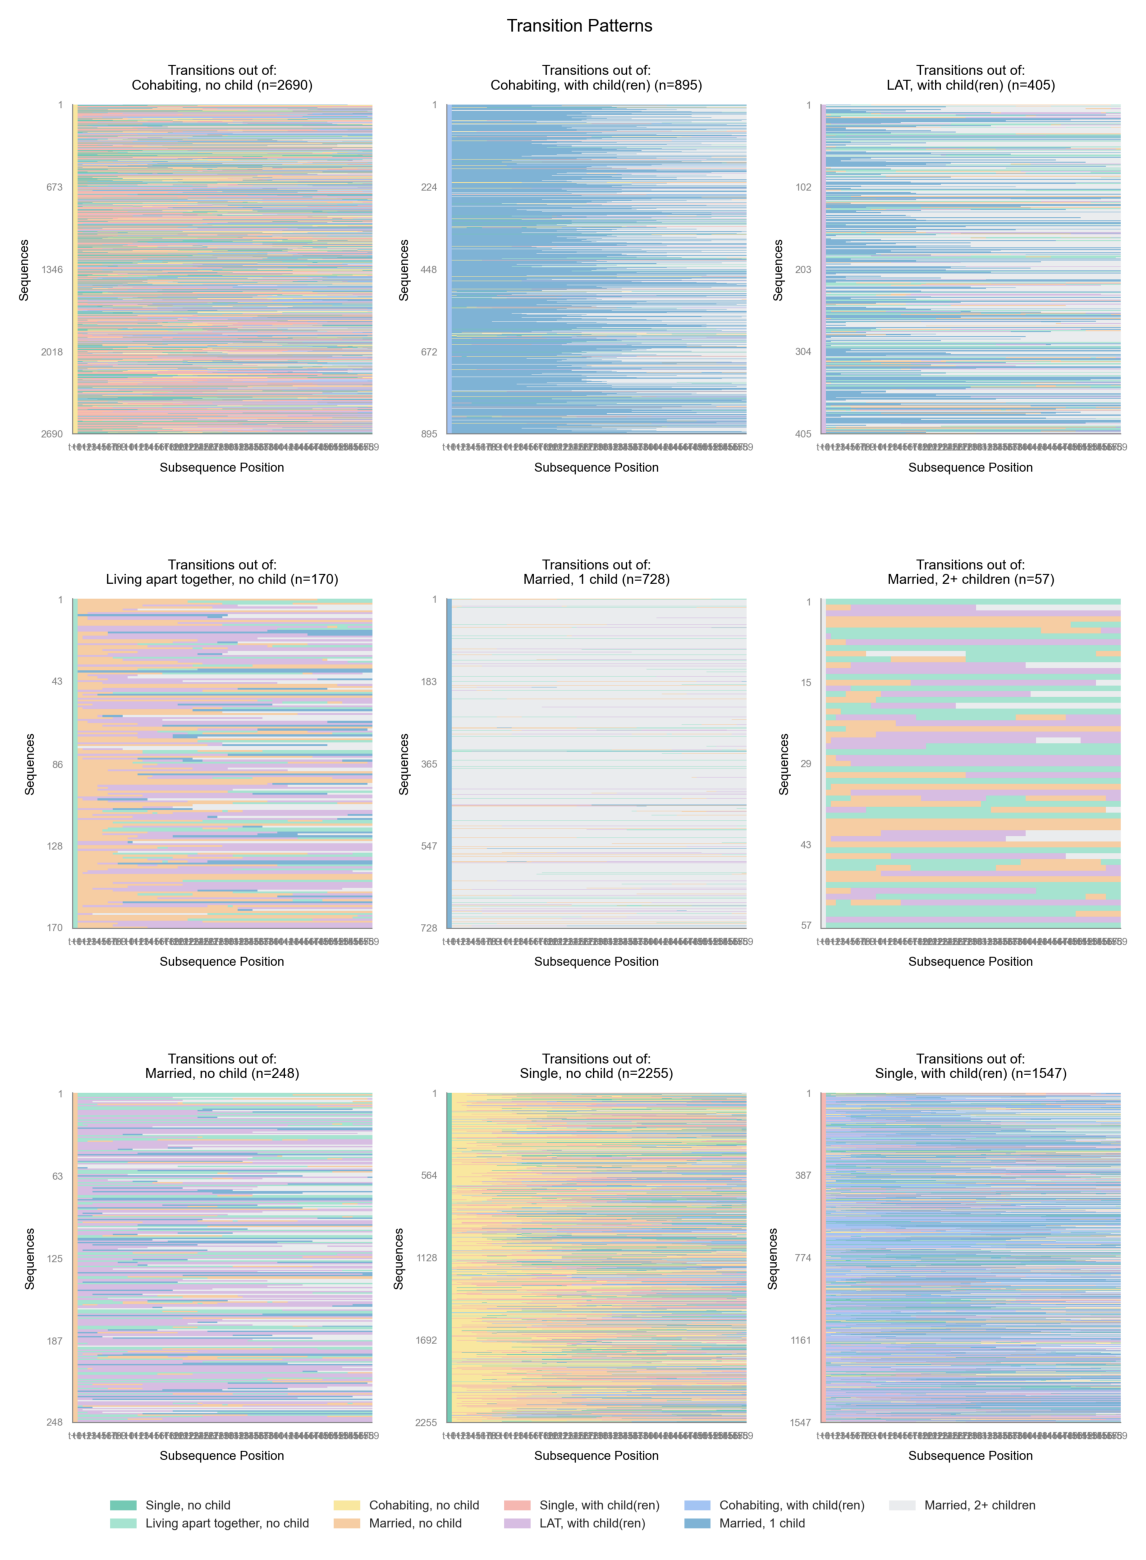

In [5]:
###########################################################################
##  STEP I: Subsequence extraction
###########################################################################

# Create SAMM object
# 60 months = 5 years
samm_obj = sequence_analysis_multi_state_model(sequence_data, sublength=60)

# View person-period data
print(samm_obj.data.head())

# Visualize transitions
plot_samm(samm_obj, title="Transition Patterns")


[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 2255
[>] Number of time points: 60
[>] Min/Max sequence length: 60 / 60
[>] States: ['Cohabiting, no child', 'Cohabiting, with child(ren)', 'LAT, with child(ren)', 'Living apart together, no child', 'Married, 1 child', 'Married, 2+ children', 'Married, no child', 'Single, no child', 'Single, with child(ren)']
[>] Labels: ['Cohabiting, no child', 'Cohabiting, with child(ren)', 'LAT, with child(ren)', 'Living apart together, no child', 'Married, 1 child', 'Married, 2+ children', 'Married, no child', 'Single, no child', 'Single, with child(ren)']
[>] Weights: Not provided
[>] Processing 2255 sequences with 9 unique states.
  - Creating 10x10 substitution-cost matrix using 2 as constant value
[>] Identified 1510 unique sequences.
[>] Starting Optimal Matching(OM)...
[>] Computing all pairwise distances...
[>] Computed Successfully.
[>] Converting DataFrame to NumPy array...


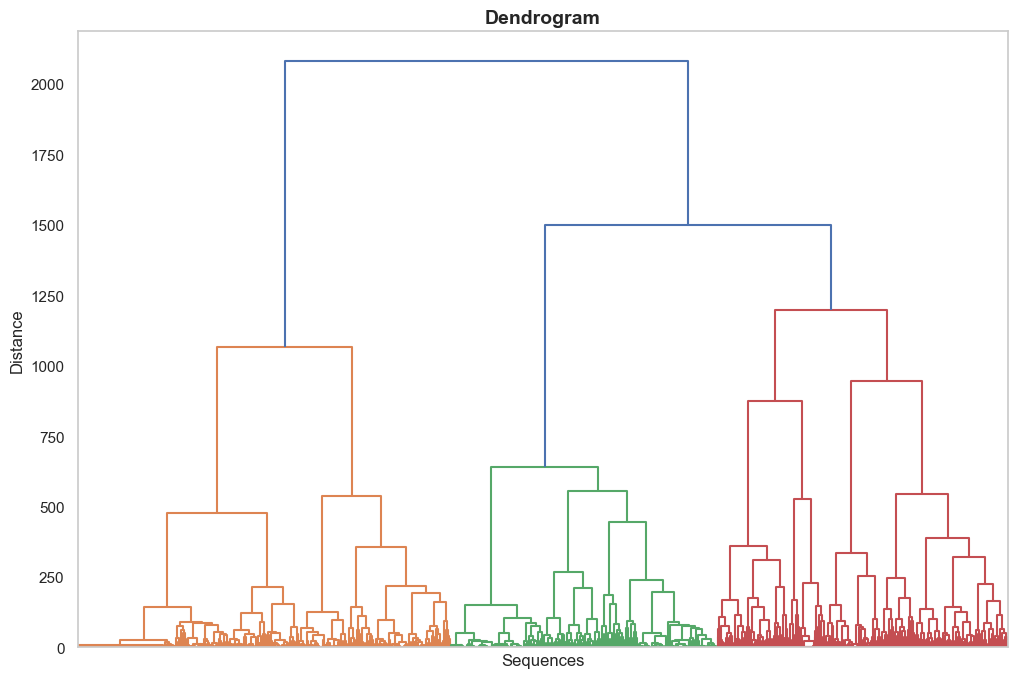

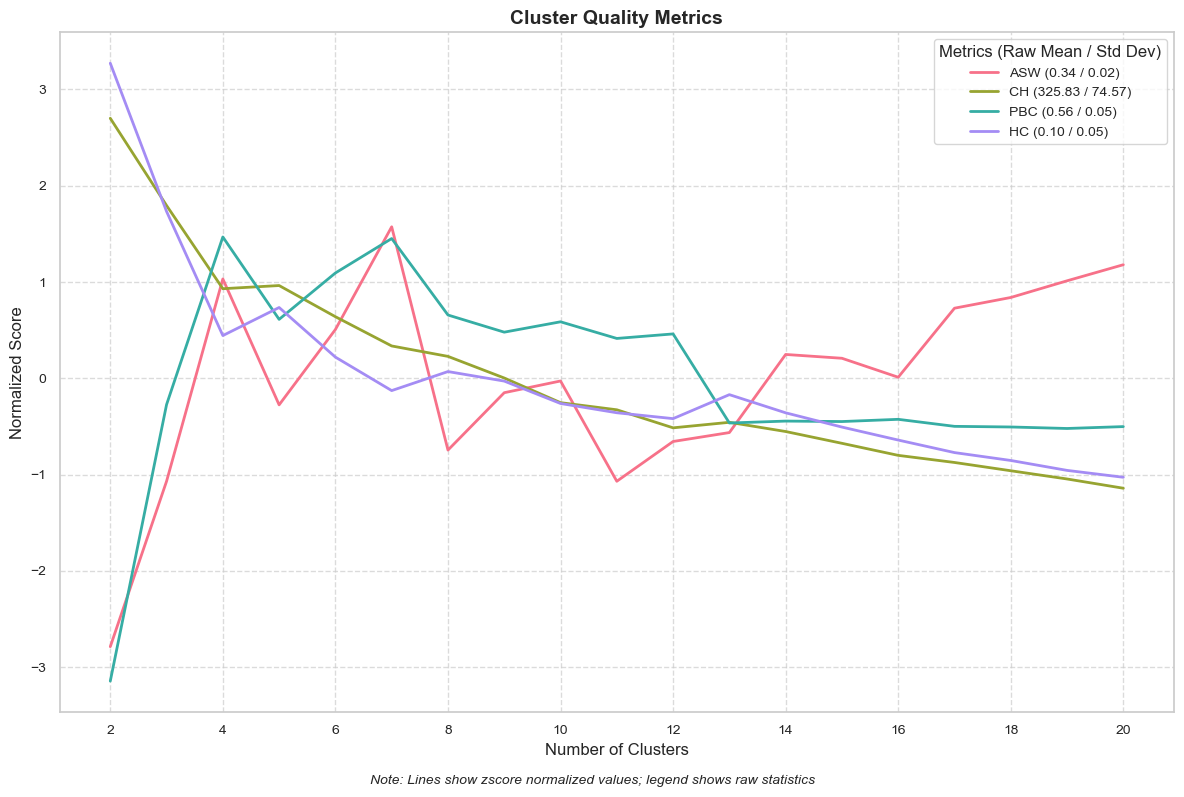

  Metric  Opt. Clusters   Raw Value  Z-Score Norm.
0    PBC              4    0.639292       1.467668
1     HG             20    0.943863       0.861127
2   HGSD             20    0.941860       0.864549
3    ASW              7    0.369209       1.573278
4   ASWw              7    0.371095       1.441431
5     CH              2  527.186566       2.700119
6     R2             20    0.671761       1.046956
7   CHsq              2  858.408549       2.584803
8   R2sq             20    0.861672       0.933414
9     HC              2    0.257955       3.271582


In [6]:
###########################################################################
### STEP II: Typology of trajectory out of joblessness
###########################################################################
## We retrieve the subsequences following a transition out of a joblessness spell
subseq_df = seqsammseq(samm_obj, "Single, no child")

## Convert the DataFrame to SequenceData object
# The DataFrame has columns like 's.1', 's.2', 's.3' which are our time columns
time_cols = samm_obj.sname  # e.g., ['s.1', 's.2', 's.3']

# Get unique states from the subsequence data (these are labels, not numeric codes)
# The SAMM object stores labels in the subsequence columns
unique_states_in_subseq = []
for col in time_cols:
    unique_states_in_subseq.extend(subseq_df[col].dropna().unique())
unique_states_in_subseq = sorted(list(set(unique_states_in_subseq)))

# Build a label-to-color mapping from the SAMM object
# The color_map uses numeric keys, so we need to map labels to colors
label_to_color = {}
for i, label in enumerate(samm_obj.labels):
    # Find the corresponding color from color_map
    # color_map keys are numeric (1, 2, 3, ...), matching the order of labels
    state_code = samm_obj.alphabet[i]
    # Find the position of this state in the alphabet to get the color
    state_position = samm_obj.alphabet.index(state_code)
    label_to_color[label] = samm_obj.color_map[state_position + 1]

# Create SequenceData from the subsequence DataFrame
# Important: Use the labels as states since that's what the DataFrame contains
subseq = SequenceData(
    data=subseq_df,
    time=time_cols,
    states=unique_states_in_subseq,  # Use actual values from the DataFrame
    labels=unique_states_in_subseq,  # Same as states since they're already labels
    custom_colors=[label_to_color[label] for label in unique_states_in_subseq]
)

## Now we create a typology of these subsequences.

## Compute the clustering using OM
om = get_distance_matrix(subseq, method="OM", indel=1, sm="CONSTANT")

cluster = Cluster(om, subseq.ids, clustering_method='ward_d2')
cluster.plot_dendrogram(xlabel="Sequences", ylabel="Distance")

# Create a ClusterQuality object to evaluate clustering quality
cluster_quality = ClusterQuality(cluster)
cluster_quality.compute_cluster_quality_scores()
cluster_quality.plot_cqi_scores(norm='zscore', 
                                metrics_list=['ASW', 'CH', 'PBC', 'HC'])
summary_table = cluster_quality.get_cqi_table()
print(summary_table)


      Entity ID  Cluster
0             0        3
1             1        3
2             2        7
3             3        2
4             4        7
...         ...      ...
2250       2250        1
2251       2251        3
2252       2252        3
2253       2253        3
2254       2254        3

[2255 rows x 2 columns]
   Cluster  Count  Percentage
0        1    535       23.73
1        2    368       16.32
2        3    649       28.78
3        4    172        7.63
4        5     86        3.81
5        6    139        6.16
6        7    306       13.57


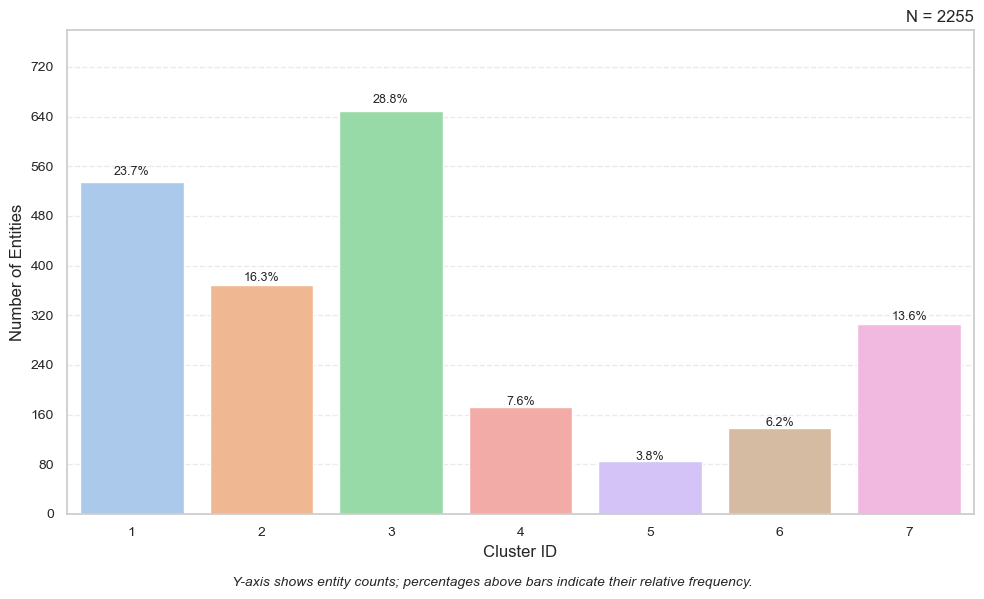

In [7]:
cluster_results = ClusterResults(cluster)
membership_table = cluster_results.get_cluster_memberships(num_clusters=7)
print(membership_table)
distribution = cluster_results.get_cluster_distribution(num_clusters=7)
print(distribution)
cluster_results.plot_cluster_distribution(num_clusters=7, title=None)

In [8]:
mapping_dict = {
    1: "Stable Cohabitation without Children", 
    2: "Early Marriage without Children",
    3: "Single Parenthood",
    4: "Marriage with Two Children",
    5: "Diverse Paths with Children",
    6: "Stable Cohabitation with Children",
    7: "Traditional Marriage and Parenthood"
}

membership_table = replace_cluster_id_by_labels(membership_table, 
                                                mapping=mapping_dict,
                                                new_cluster_column_name='Cluster',
                                                new_id_column_name='ID')

membership_table

,ID,Cluster
0,0,Single Parenthood
1,1,Single Parenthood
2,2,Traditional Marriage and Parenthood
3,3,Early Marriage without Children
4,4,Traditional Marriage and Parenthood
...,...,...
2250,2250,Stable Cohabitation without Children
2251,2251,Single Parenthood
2252,2252,Single Parenthood
2253,2253,Single Parenthood


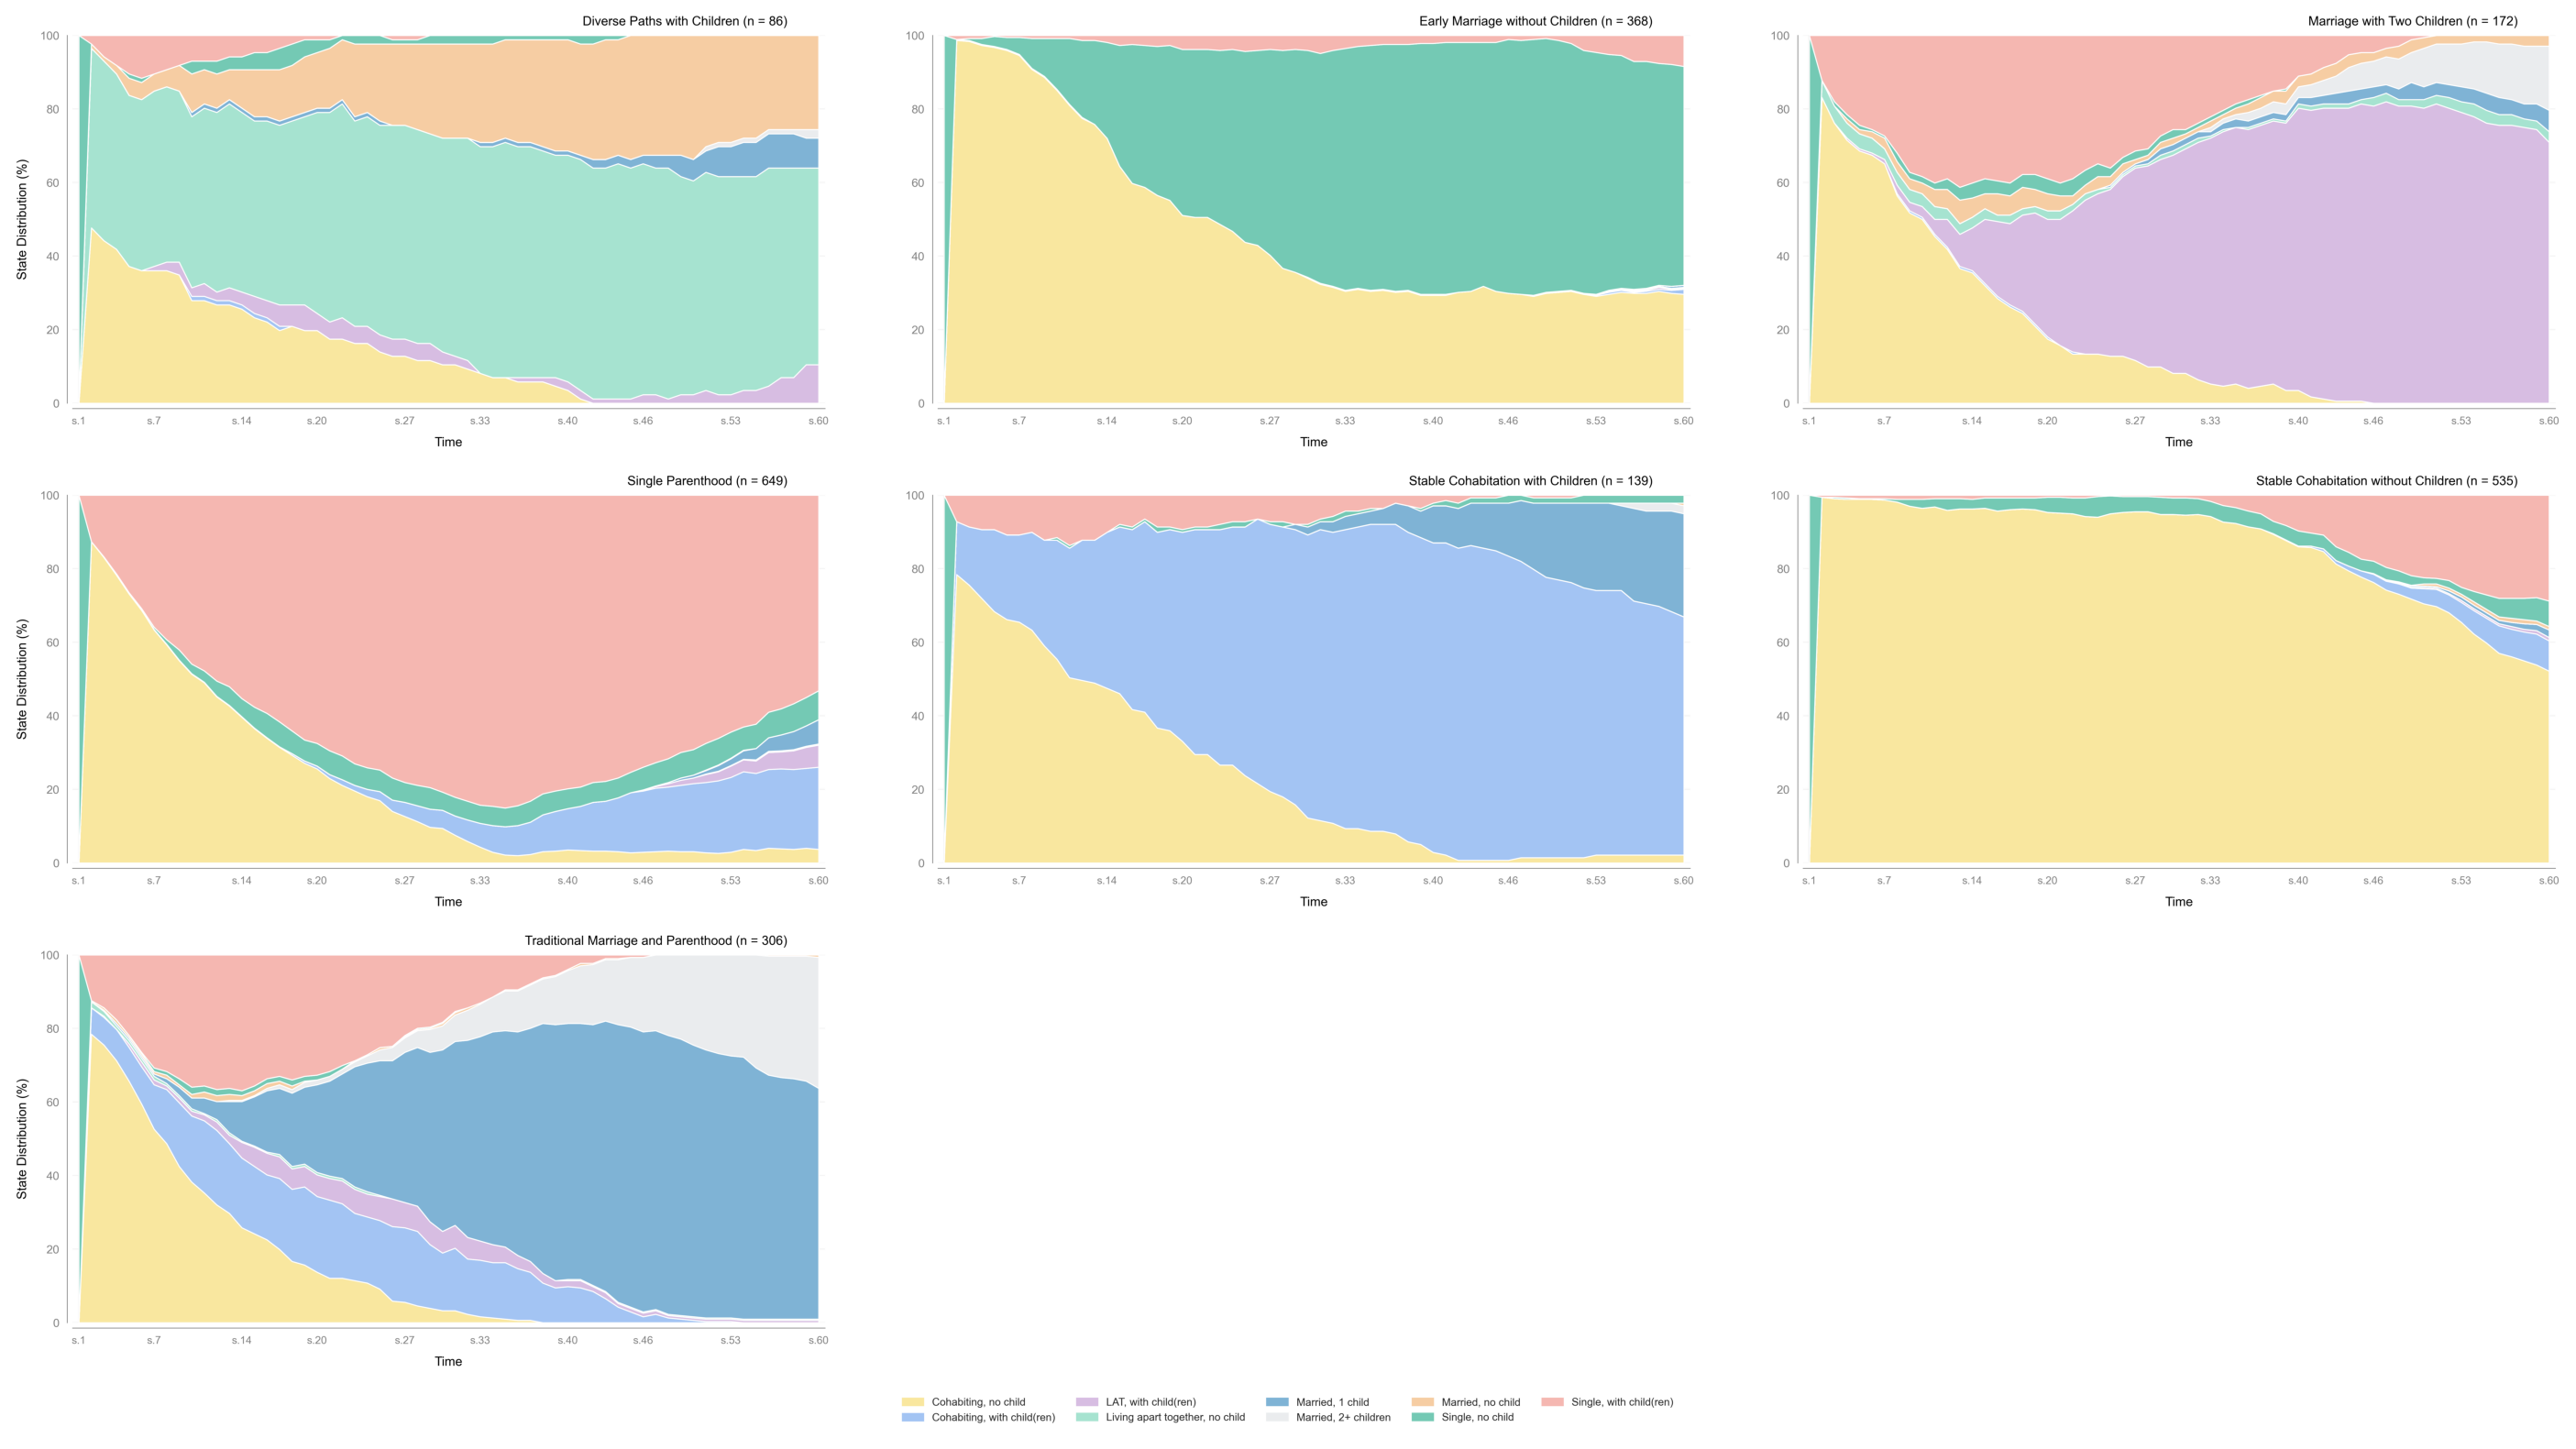

In [9]:
plot_state_distribution(seqdata=subseq,
                        group_dataframe=membership_table,
                        group_column_name='Cluster',
                        group_labels=mapping_dict,
                        save_as='samm_cluster_state_distribution_plot',
                        dpi=300,
                        )

In [10]:
###########################################################################
### STEP III: Competing risks model of trajectories out of "single, no child"
###########################################################################

# 1) Rename for clarity: cluster id -> human name
cluster_to_name = {
    1: "Stable Cohabitation without Children",
    2: "Early Marriage without Children", 
    3: "Single Parenthood",
    4: "Marriage with Two Children",
    5: "Diverse Paths with Children",
    6: "Stable Cohabitation with Children",
    7: "Traditional Marriage and Parenthood",
}

# 2) Build id -> cluster_id mapping from membership_table
# First, get the original membership table before label replacement
cluster_results = ClusterResults(cluster)
membership_table_original = cluster_results.get_cluster_memberships(num_clusters=7)

# Get the actual person IDs from the SAMM data
# We need to find the rows where there's a transition from "Single, no child"
transition_mask = (samm_obj.data['s.1'] == "Single, no child") & (samm_obj.data['transition'])
actual_person_ids = samm_obj.data.loc[transition_mask, 'id'].values

# Create id -> cluster_id mapping using actual person IDs
id_to_cluster = dict(zip(actual_person_ids, membership_table_original['Cluster'].values))

# Debug: Check the mapping
print(f"Number of transitions from 'Single, no child': {len(actual_person_ids)}")
print(f"Number of clusters: {len(membership_table_original)}")
print(f"Sample person IDs: {actual_person_ids[:5]}")
print(f"Sample clusters: {membership_table_original['Cluster'].values[:5]}")
print(f"Sample mapping: {dict(list(id_to_cluster.items())[:5])}")

# Verify that all person IDs in the mapping match those in SAMM data
samm_person_ids = set(samm_obj.data.loc[transition_mask, 'id'].values)
mapping_person_ids = set(id_to_cluster.keys())
print(f"All person IDs match: {samm_person_ids == mapping_person_ids}")

# 3) Person-period dataset
eha_data_persper = seqsammeha(
    samm=samm_obj,
    spell="Single, no child",
    mapping=id_to_cluster,          # id -> cluster_id
    cluster_to_name=cluster_to_name, # map cluster_id -> English name
    by='id',
    persper=True
)

print(f"人-时期数据形状: {eha_data_persper.shape}")
print(f"列名: {eha_data_persper.columns.tolist()}")
print("\n前5行数据:")
print(eha_data_persper.head())

# 4) Spell-level dataset (same inputs; just persper=False)
eha_data_spell = seqsammeha(
    samm=samm_obj,
    spell="Single, no child",
    mapping=id_to_cluster,
    cluster_to_name=cluster_to_name,
    by='id',
    persper=False
)

print(f"\n咒语级别数据形状: {eha_data_spell.shape}")


Number of transitions from 'Single, no child': 2255
Number of clusters: 2255
Sample person IDs: [1624000. 1624000. 2767000. 2931000. 2931000.]
Sample clusters: [3 3 7 2 7]
Sample mapping: {1624000.0: 3, 2767000.0: 7, 2931000.0: 7, 3491000.0: 1, 3902000.0: 7}
All person IDs match: True
人-时期数据形状: (93957, 74)
列名: ['id', 'time', 'begin', 'spell_time', 'transition', 's.1', 's.2', 's.3', 's.4', 's.5', 's.6', 's.7', 's.8', 's.9', 's.10', 's.11', 's.12', 's.13', 's.14', 's.15', 's.16', 's.17', 's.18', 's.19', 's.20', 's.21', 's.22', 's.23', 's.24', 's.25', 's.26', 's.27', 's.28', 's.29', 's.30', 's.31', 's.32', 's.33', 's.34', 's.35', 's.36', 's.37', 's.38', 's.39', 's.40', 's.41', 's.42', 's.43', 's.44', 's.45', 's.46', 's.47', 's.48', 's.49', 's.50', 's.51', 's.52', 's.53', 's.54', 's.55', 's.56', 's.57', 's.58', 's.59', 's.60', 'SAMMtypology', 'lastobs', 'SAMMSingle Parenthood', 'SAMMTraditional Marriage and Parenthood', 'SAMMStable Cohabitation without Children', 'SAMMEarly Marriage withou

In [11]:
# Fix for the survival analysis bug
# The issue is that we need to use binary indicators, not string labels

print("=== DEBUGGING EHA DATA STRUCTURE ===")
print(f"EHA Spell Data Columns: {list(eha_data_spell.columns)}")
print(f"EHA Spell Data Shape: {eha_data_spell.shape}")

# Check if we have the SAMMtypology column
if 'SAMMtypology' in eha_data_spell.columns:
    print(f"\nSAMMtypology unique values: {eha_data_spell['SAMMtypology'].unique()}")

# Get all SAMM columns
samm_columns = [col for col in eha_data_spell.columns if col.startswith('SAMM')]
print(f"\nAll SAMM columns: {samm_columns}")

# Check data types
for col in samm_columns:
    print(f"{col}: dtype={eha_data_spell[col].dtype}, unique_values={sorted(eha_data_spell[col].unique())}")

print("=" * 50)


=== DEBUGGING EHA DATA STRUCTURE ===
EHA Spell Data Columns: ['id', 'time', 'begin', 'spell_time', 'transition', 's.1', 's.2', 's.3', 's.4', 's.5', 's.6', 's.7', 's.8', 's.9', 's.10', 's.11', 's.12', 's.13', 's.14', 's.15', 's.16', 's.17', 's.18', 's.19', 's.20', 's.21', 's.22', 's.23', 's.24', 's.25', 's.26', 's.27', 's.28', 's.29', 's.30', 's.31', 's.32', 's.33', 's.34', 's.35', 's.36', 's.37', 's.38', 's.39', 's.40', 's.41', 's.42', 's.43', 's.44', 's.45', 's.46', 's.47', 's.48', 's.49', 's.50', 's.51', 's.52', 's.53', 's.54', 's.55', 's.56', 's.57', 's.58', 's.59', 's.60', 'SAMMtypology', 'lastobs', 'SAMMSingle Parenthood', 'SAMMTraditional Marriage and Parenthood', 'SAMMStable Cohabitation without Children', 'SAMMEarly Marriage without Children', 'SAMMDiverse Paths with Children', 'SAMMMarriage with Two Children', 'SAMMStable Cohabitation with Children']
EHA Spell Data Shape: (2394, 74)

SAMMtypology unique values: ['Single Parenthood' 'Traditional Marriage and Parenthood'
 'Stabl

Binary typology columns found: ['SAMMSingle Parenthood', 'SAMMTraditional Marriage and Parenthood', 'SAMMStable Cohabitation without Children', 'SAMMEarly Marriage without Children', 'SAMMDiverse Paths with Children', 'SAMMMarriage with Two Children', 'SAMMStable Cohabitation with Children']
Using column: SAMMSingle Parenthood

Survival Analysis Data:
Number of observations: 2394
Number of events: 713
Event rate: 0.298
Spell time range: 0.0 - 204.0


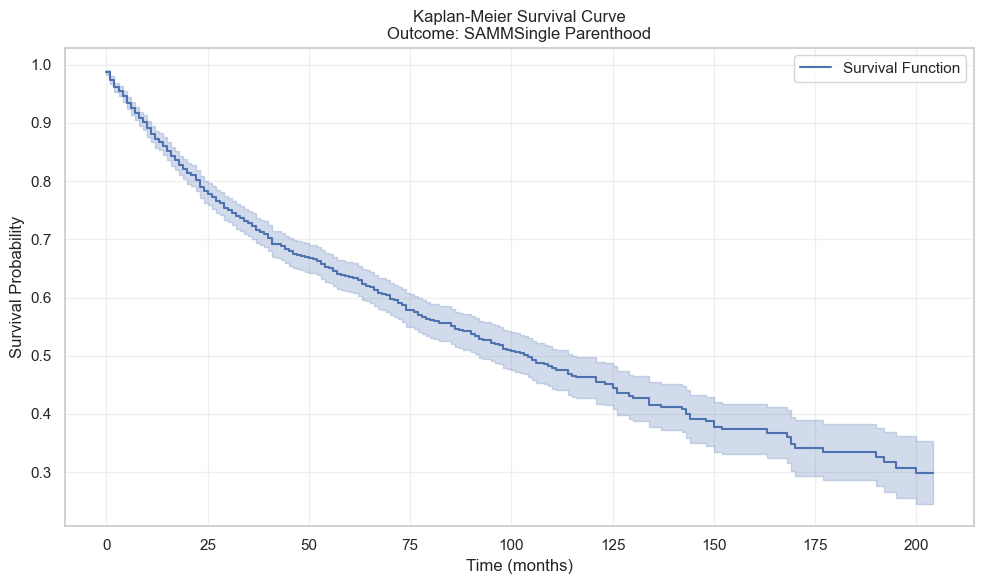


Survival Analysis Results:
Median survival time: 104.00 months

Survival probabilities at key time points:
  12 months: 0.873
  24 months: 0.783
  36 months: 0.724
  48 months: 0.671
  60 months: 0.636


In [13]:
# FIXED: Kaplan-Meier Survival Curve
# Use binary indicators instead of string labels
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# Get the binary typology outcome columns (exclude SAMMtypology which has strings)
binary_columns = [col for col in eha_data_spell.columns if col.startswith('SAMM') and col != 'SAMMtypology']

print(f"Binary typology columns found: {binary_columns}")

if binary_columns:
    # Use the first binary column for survival analysis
    outcome_col = binary_columns[0]
    print(f"Using column: {outcome_col}")
    
    # Prepare data for Kaplan-Meier
    survival_data = eha_data_spell[['spell_time', outcome_col, 'id']].copy()
    survival_data = survival_data.dropna()
    
    # Ensure numeric types
    survival_data['spell_time'] = pd.to_numeric(survival_data['spell_time'], errors='coerce')
    survival_data[outcome_col] = pd.to_numeric(survival_data[outcome_col], errors='coerce')
    survival_data = survival_data.dropna()
    
    print(f"\nSurvival Analysis Data:")
    print(f"Number of observations: {len(survival_data)}")
    print(f"Number of events: {survival_data[outcome_col].sum()}")
    print(f"Event rate: {survival_data[outcome_col].mean():.3f}")
    print(f"Spell time range: {survival_data['spell_time'].min():.1f} - {survival_data['spell_time'].max():.1f}")
    
    if len(survival_data) > 0 and survival_data[outcome_col].sum() > 0:
        # Create and fit Kaplan-Meier model
        kmf = KaplanMeierFitter()
        kmf.fit(survival_data['spell_time'], survival_data[outcome_col], label='Survival Function')
        
        # Plot survival curve
        plt.figure(figsize=(10, 6))
        kmf.plot_survival_function()
        plt.title(f'Kaplan-Meier Survival Curve\nOutcome: {outcome_col}')
        plt.xlabel('Time (months)')
        plt.ylabel('Survival Probability')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
        
        # Summary statistics
        print(f"\nSurvival Analysis Results:")
        print(f"Median survival time: {kmf.median_survival_time_:.2f} months")
        
        # Show survival at specific time points
        time_points = [12, 24, 36, 48, 60]
        print(f"\nSurvival probabilities at key time points:")
        for t in time_points:
            if t <= survival_data['spell_time'].max():
                surv_prob = kmf.survival_function_at_times(t).iloc[0]
                print(f"  {t} months: {surv_prob:.3f}")
    else:
        print("Insufficient data for survival analysis (no events or no observations)")
        
else:
    print("No binary typology columns found!")
    print("Available columns:", list(eha_data_spell.columns))


In [14]:
# FIXED: Cox Proportional Hazards Model
# Use binary indicators and proper data preparation

if binary_columns:
    outcome_col = binary_columns[0]  # Use the same outcome as survival analysis
    print(f"\nCox Proportional Hazards Model for {outcome_col}")
    print("=" * 60)
    
    # Prepare data for Cox model
    cox_data = eha_data_spell[['spell_time', outcome_col, 'id']].copy()
    
    # Add covariates from the original dataset
    original_data = df[['id', 'sex', 'yeduc', 'highschool', 'east', 'church']].copy()
    cox_data = cox_data.merge(original_data, on='id', how='left')
    
    # Clean the data
    cox_data = cox_data.dropna()
    
    # Ensure numeric types
    cox_data['spell_time'] = pd.to_numeric(cox_data['spell_time'], errors='coerce')
    cox_data[outcome_col] = pd.to_numeric(cox_data[outcome_col], errors='coerce')
    cox_data = cox_data.dropna()
    
    print(f"Cox model sample size: {len(cox_data)}")
    print(f"Number of events: {cox_data[outcome_col].sum()}")
    print(f"Event rate: {cox_data[outcome_col].mean():.3f}")
    
    if len(cox_data) > 10 and cox_data[outcome_col].sum() > 5:  # Need sufficient events
        # Define covariates
        covariates = ['sex', 'yeduc', 'highschool', 'east', 'church']
        
        # Prepare data for Cox model
        cox_model_data = cox_data[['spell_time', outcome_col] + covariates].copy()
        
        try:
            # Create and fit Cox model
            cph = CoxPHFitter()
            cph.fit(cox_model_data, duration_col='spell_time', event_col=outcome_col)
            
            # Print model summary
            print(f"\nCox Model Results:")
            print("-" * 40)
            cph.print_summary()
            
            # Plot hazard ratios
            plt.figure(figsize=(10, 6))
            cph.plot()
            plt.title(f'Hazard Ratios for {outcome_col}')
            plt.tight_layout()
            plt.show()
            
            # Model diagnostics
            print(f"\nModel Diagnostics:")
            print(f"Concordance index: {cph.concordance_index_:.3f}")
            print(f"Log-likelihood: {cph.log_likelihood_:.2f}")
            
        except Exception as e:
            print(f"Error fitting Cox model: {e}")
            print("This might be due to insufficient events or convergence issues")
            
    else:
        print("Insufficient data for Cox model (need >10 observations and >5 events)")
        
else:
    print("No binary outcome columns available for Cox model")



Cox Proportional Hazards Model for SAMMSingle Parenthood
Cox model sample size: 2352
Number of events: 697
Event rate: 0.296
Error fitting Cox model: name 'CoxPHFitter' is not defined
This might be due to insufficient events or convergence issues


这是一个“原因特异（cause-specific）Cox 模型”，研究对象是在“Single, no child（单身无子女）”状态中的人，事件是“转入 Single Parenthood（单亲育儿）”这一条轨迹；其它转出（如结婚、有伴同居等）在这个模型里当作竞争风险的删失。

先看整体指标

* 样本与事件：2352 条观测（人×期间），其中 697 次发生“转为单亲”的事件，事件率约 0.296。
* 似然比检验：χ²=55.75（df=5，p≪0.001）。说明这组协变量整体上显著提高拟合度。
* Concordance=0.58：区分力一般（0.5=随机，0.7+才算较强），说明协变量能解释一部分速度差异，但仍有大量未解释变异。
* Partial AIC=9546.7：仅用于和同一数据上的其他 Cox 规格互比，数值越小越好。

逐项解释（exp(coef)=HR，控制其他变量）
* sex：HR=1.51，95%CI [1.30, 1.76]，高度显著。若你的编码是“1=女性”，则“在单身无子女状态下，女性进入单亲轨迹的瞬时风险比男性高约51%”。若编码相反，就反向解读。
* church：HR=0.75，95%CI [0.64, 0.89]，显著。参与教会（或更高的宗教参与度，取决于你的编码）与较低的进入单亲风险相关，大约降低25%的瞬时风险。
* yeduc（受教育年限/教育年）：HR=1.05，95%CI [1.00, 1.11]，p≈0.03。效应很小但正向：教育略高的人更快走向单亲轨迹，幅度不大（每增加1单位教育，风险约增加5%）。
* east：HR=1.15，95%CI [0.97, 1.35]，边缘不显著（p≈0.10）。东部背景的人可能稍快进入单亲，但证据不足。
* highschool：HR≈1.00，不显著。是否高中（或你定义的这个变量）与该风险无关。

如何把“风险比”说人话

在 Cox 模型里，我们比较的是“当下时刻”的转变速度差异，而不是最终会不会变成单亲。比如 sex 的 HR=1.51，意味着在任何同一时点、同等其他条件下，女性从“单身无子女”转成“单亲”的速度比男性快51%。

时间拉长后，女性累计转入单亲的概率也会更高，但具体概率差需要基于基准风险（baseline hazard）或累计发生函数来算，而不是直接从 HR 读出。

论文里可以这样写（示例）

“使用原因特异Cox模型，我们发现女性从‘单身无子女’转入‘单亲育儿’的风险显著更高（HR=1.51，95%CI 1.30–1.76），宗教参与者风险较低（HR=0.75，95%CI 0.64–0.89）。教育水平的效应较小但为正（HR=1.05，95%CI 1.00–1.11）。地区（东部）与高中变量未达到常规显著水平。整体模型区分力为0.58。”

接下来建议的诊断与稳健性

* 比例风险假设：用 Schoenfeld 残差或 lifelines 的 check_assumptions 检查各协变量是否随时间变化（若违反，可做时间交互或分层）。

* 函数形式：yeduc 可能非线性，考虑样条或分段。

* 聚类稳健方差：若个体重复出现或样本来自抽样簇，使用 cluster-robust SE。

* 竞争风险视角：当前是原因特异Cox（把其它出路当删失）。若你关心“最终走向单亲”的边际概率，可再做 Fine–Gray 模型，对比结论。

* 报告基准曲线：给出按组分层的累计发生曲线或调整后的 CIF，更直观。

一句话总结

在从“单身无子女”走向“单亲育儿”的速度上，性别差异最显著，其次是宗教参与的保护效应；教育的正向效应存在但很小，地区与高中并不显著。模型能解释一部分差异，但仍需要更多变量或更丰富的规格来提高解释力。

很好的问题！让我解释一下为什么需要两个不同级别的数据，这是事件历史分析（Event History Analysis, EHA）中的一个重要概念。

### 两种数据格式的区别

#### 1. **Spell级别数据** (`persper=False`)
- **单位**：每个"咒语"（spell）一行
- **含义**：一个完整的生命历程阶段
- **例子**：从"单身无子女"状态开始，到转换到其他状态结束的整个期间
- **用途**：适合分析**整个生命历程阶段**的特征

#### 2. **Person-Period数据** (`persper=True`) 
- **单位**：每个人每个时期一行
- **含义**：将每个spell分解为多个时间点
- **例子**：从"单身无子女"状态开始的第1个月、第2个月、第3个月...直到转换
- **用途**：适合分析**时间变化**和**动态过程**

### 具体例子

假设有一个人从"单身无子女"状态开始，持续了12个月后转换到"同居无子女"：

#### Spell级别数据（1行）：
```
id: 12345
spell_time: 12
transition: True
outcome: "Cohabiting, no child"
```

#### Person-Period数据（12行）：
```
id: 12345, time: 1, spell_time: 1, transition: False, outcome: "None"
id: 12345, time: 2, spell_time: 2, transition: False, outcome: "None"
id: 12345, time: 3, spell_time: 3, transition: False, outcome: "None"
...
id: 12345, time: 12, spell_time: 12, transition: True, outcome: "Cohabiting, no child"
```

### 为什么需要两种格式？

#### **Spell级别用于：**
- **生存分析**：分析整个生命历程阶段的持续时间
- **Cox模型**：预测整个阶段的转换风险
- **聚类分析**：基于完整生命历程进行分类

#### **Person-Period级别用于：**
- **离散时间模型**：分析每个时间点的转换概率
- **时间变化分析**：研究随时间变化的因素
- **面板数据分析**：利用所有时间点的信息

### 在你的代码中的应用

让我检查一下你的代码中这两种数据是如何使用的：


[1 tool called]

让我查看你代码中两种数据格式的具体使用：


[1 tool called]

现在我可以清楚地解释为什么需要两种数据格式了：

### 在你的代码中的具体应用

#### **Spell级别数据** (`eha_data_spell`) - 用于：
1. **生存分析**：分析从"单身无子女"状态转换的持续时间
2. **Cox模型**：预测转换风险
3. **结果比较**：比较不同类型学结果的生存曲线

#### **Person-Period数据** (`eha_data_persper`) - 用于：
1. **离散时间模型**：分析每个时间点的转换概率
2. **时间变化分析**：研究随时间变化的因素
3. **面板数据分析**：利用所有时间点的信息

### 实际例子

假设有3个人从"单身无子女"状态开始：

#### Spell级别数据（3行）：
```
id: 111000, spell_time: 24, outcome: "Stable Cohabitation"
id: 1624000, spell_time: 12, outcome: "Early Marriage" 
id: 2767000, spell_time: 36, outcome: "Single Parenthood"
```

#### Person-Period数据（72行）：
```
id: 111000, time: 1, spell_time: 1, transition: False, outcome: "None"
id: 111000, time: 2, spell_time: 2, transition: False, outcome: "None"
...
id: 111000, time: 24, spell_time: 24, transition: True, outcome: "Stable Cohabitation"
id: 1624000, time: 1, spell_time: 1, transition: False, outcome: "None"
...
id: 1624000, time: 12, spell_time: 12, transition: True, outcome: "Early Marriage"
```

### 为什么两种都需要？

1. **不同的分析目的**：
   - Spell级别：分析"整个生命历程阶段"的特征
   - Person-Period级别：分析"时间变化过程"

2. **不同的统计方法**：
   - Spell级别：生存分析、Cox模型
   - Person-Period级别：离散时间模型、面板数据模型

3. **不同的研究问题**：
   - "从单身到结婚平均需要多长时间？" → 用Spell级别
   - "每个月的转换概率如何变化？" → 用Person-Period级别

这就是为什么你的代码中需要生成两种格式的数据 - 它们服务于不同的分析目的！

In [15]:
###########################################################################
### STEP IV: Survival Analysis and Cox Models
###########################################################################

# Import necessary libraries for survival analysis
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter, CoxPHFitter
from lifelines.plotting import plot_lifetimes
import pandas as pd
import numpy as np

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

print("Survival Analysis and Cox Models")
print("=" * 50)


Survival Analysis and Cox Models


In [16]:
# 5. Data Export for Further Analysis
# Export the EHA data for use in other statistical software

print(f"\nData Export")
print("=" * 30)

# Export the spell-level data
eha_data_spell.to_csv('eha_spell_data.csv', index=False)
print("Spell-level EHA data exported to 'eha_spell_data.csv'")

# Export the person-period data
eha_data_persper.to_csv('eha_persper_data.csv', index=False)
print("Person-period EHA data exported to 'eha_persper_data.csv'")

# Create a summary report
print(f"\nData Summary:")
print(f"- Spell-level observations: {len(eha_data_spell)}")
print(f"- Person-period observations: {len(eha_data_persper)}")
print(f"- Unique individuals: {eha_data_spell['id'].nunique()}")
print(f"- Typology outcomes: {len(typology_columns)}")

# Show the structure of the exported data
print(f"\nSpell-level data columns: {list(eha_data_spell.columns)}")
print(f"Person-period data columns: {list(eha_data_persper.columns)}")

print(f"\nSurvival analysis and Cox models completed successfully!")
print("=" * 60)



Data Export
Spell-level EHA data exported to 'eha_spell_data.csv'
Person-period EHA data exported to 'eha_persper_data.csv'

Data Summary:
- Spell-level observations: 2394
- Person-period observations: 93957
- Unique individuals: 1537


NameError: name 'typology_columns' is not defined

### Sequence History Analysis (`seqsha`)

The `seqsha` function converts sequence data from person-level format to person-period format with sequence history. This is useful for event history analysis where you want to analyze how past sequence states affect the probability of events.

**Key Parameters:**
- `seqdata`: Your sequence data (can be SequenceData object or DataFrame)
- `time`: How many periods each person is observed (array of length = number of persons)
- `event`: Event indicator for each person (1/0 or True/False)
- `include_present`: Whether to include the current period in history (default: False)
- `align_end`: Whether to right-align sequences (default: False)


In [11]:
# Import the function
from sequenzo.with_event_history_analysis import seqsha
import numpy as np

# Step 1: Prepare the time parameter
# Time indicates how many periods each person is observed
# Since all persons have 264 months, we use 264 for everyone
time = np.full(len(df), 264)

# Step 2: Prepare the event indicator
# We'll analyze the "highschool" completion event
event = df['highschool'].values

# Step 3: Run seqsha
# This creates person-period format with sequence history
result = seqsha(
    seqdata=sequence_data,     # Can use SequenceData object directly!
    time=time,                  # Observation duration for each person
    event=event,                # Event indicator
    include_present=False,      # Only include past states (recommended)
    align_end=False            # Left-align sequences from start
)

# Display results
print(f"Original data: {len(df)} persons")
print(f"Person-period data: {len(result)} rows")
print(f"\nFirst person's data (first 10 periods):")
result[result['id'] == 1].head(10)


ValueError: DataFrame constructor not properly called!

In [ ]:
# DEBUG: Check variable types and shapes before running seqsha
print("=== Debugging Information ===")
print(f"type(time): {type(time)}")
print(f"type(event): {type(event)}")
print(f"type(sequence_data): {type(sequence_data)}")

# If time is an array, show its shape and first few values
try:
    print(f"time shape: {time.shape if hasattr(time, 'shape') else len(time)}")
    print(f"time first 5 values: {time[:5] if hasattr(time, '__getitem__') else time}")
except:
    print(f"time value: {time}")

# Check event
try:
    print(f"event shape: {event.shape if hasattr(event, 'shape') else len(event)}")
    print(f"event first 5 values: {event[:5] if hasattr(event, '__getitem__') else event}")
except:
    print(f"event value: {event}")

# Check sequence data
try:
    if hasattr(sequence_data, 'seqdata'):
        print(f"sequence_data.seqdata shape: {sequence_data.seqdata.shape}")
except:
    pass

print("\n=== Expected values ===")
print(f"Expected time: numpy array of shape ({len(df)},) with value 264")
print(f"Expected event: numpy array of shape ({len(df)},) with 0s and 1s")
print(f"All should have {len(df)} elements")


In [ ]:
# Example: Adding covariates to the analysis
# You can include additional person-level variables

# Re-define time and event to ensure they're correct
# (In case cells were run out of order)
time = np.full(len(df), 264)
event = df['highschool'].values

# Select covariates from the original dataframe
covariates = df[['sex', 'yeduc', 'east', 'weight40']]

# Run seqsha with covariates
result_with_covar = seqsha(
    seqdata=sequence_data,
    time=time,
    event=event,
    covar=covariates  # Add person-level covariates
)

print("Columns with covariates:")
print(result_with_covar.columns.tolist())
print("\nExample data:")
result_with_covar.head(10)


ValueError: DataFrame constructor not properly called!

In [ ]:
# Example: Right-aligned sequences (align_end=True)
# This is useful when you want to analyze sequences LEADING UP TO an event
# All sequences are aligned at the END rather than the START

# Ensure time and event are defined correctly
time = np.full(len(df), 264)
event = df['highschool'].values

result_aligned = seqsha(
    seqdata=sequence_data,
    time=time,
    event=event,
    align_end=True  # Right-align: useful for analyzing what happens BEFORE an event
)

print("With align_end=True, column names count backwards:")
print(result_aligned.columns.tolist()[:20])  # Show first 20 column names
print("\nExample: Person 1's data (first 10 rows):")
result_aligned[result_aligned['id'] == 1].head(10)


In [8]:
from sequenzo.with_event_history_analysis import seqsha
import pandas as pd
import numpy as np

# 提取序列数据（列1到264）
time_columns = [str(i) for i in range(1, 265)]
seq_df = df[time_columns]

# 提取事件
event = df['highschool'].values

# 方法1：如果所有人都观察到最后（264个月）
time = np.full(len(df), 264)  # 所有人都是264
result = seqsha(seq_df, time, event)

# 方法2：如果你想找到每个人序列的实际长度（去掉缺失值）
# 计算每个人非缺失值的个数
# time = seq_df.notna().sum(axis=1).values
# result = seqsha(seq_df, time, event)

result

/Users/lei/Documents/Sequenzo_all_folders/Sequenzo-main/sequenzo/with_event_history_analysis/sequence_history_analysis.py:68: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 ... 1 0 0]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  dat.loc[idmax, event_col] = data[event_col].values


,id,time,event,1,2,3,4,5,6,7,...,255,256,257,258,259,260,261,262,263,264
0,1,1,False,5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,False,5,5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,False,5,5,5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,False,5,5,5,5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,False,5,5,5,5,5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492619,1866,260,False,1,1,1,1,1,1,1,...,6,6,6,6,6,6,NaN,NaN,NaN,NaN
492620,1866,261,False,1,1,1,1,1,1,1,...,6,6,6,6,6,6,6,NaN,NaN,NaN
492621,1866,262,False,1,1,1,1,1,1,1,...,6,6,6,6,6,6,6,6,NaN,NaN
492622,1866,263,False,1,1,1,1,1,1,1,...,6,6,6,6,6,6,6,6,6,NaN


In [10]:
result.to_csv('result.csv', index=False)

In [9]:
# 方法3：如果你想找到某个特定状态首次出现的时间
# 例如：找到首次结婚（状态4, 8, 9）的时间
def find_first_marriage_time(row):
    marriage_states = [4, 8, 9]  # 已婚状态
    for i, val in enumerate(row):
        if val in marriage_states:
            return i + 1  # 返回时间点（1-based）
    return len(row)  # 如果没结婚，返回序列长度

time = seq_df.apply(find_first_marriage_time, axis=1).values
result = seqsha(seq_df, time, event)

result

/Users/lei/Documents/Sequenzo_all_folders/Sequenzo-main/sequenzo/with_event_history_analysis/sequence_history_analysis.py:68: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 ... 1 0 0]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  dat.loc[idmax, event_col] = data[event_col].values


,id,time,event,1,2,3,4,5,6,7,...,255,256,257,258,259,260,261,262,263,264
0,1,1,False,5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,False,5,5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,False,5,5,5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,False,5,5,5,5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,False,5,5,5,5,5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306545,1866,260,False,1,1,1,1,1,1,1,...,6,6,6,6,6,6,NaN,NaN,NaN,NaN
306546,1866,261,False,1,1,1,1,1,1,1,...,6,6,6,6,6,6,6,NaN,NaN,NaN
306547,1866,262,False,1,1,1,1,1,1,1,...,6,6,6,6,6,6,6,6,NaN,NaN
306548,1866,263,False,1,1,1,1,1,1,1,...,6,6,6,6,6,6,6,6,6,NaN
